In [127]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12346)

# Función de costo F(x) = (Ax - b)^T (Ax - b)
def cost_function(A, x, b):
    return np.linalg.norm(A @ x - b)**2

def cost_function_L2(A, x, b, delta2):
    return np.linalg.norm(A @ x - b)**2 + delta2 * np.linalg.norm(x)**2

# Gradiente de la función de costo F
def gradient(A, x, b):
    return 2 * A.T @ (A @ x - b)

def norm_squared(x):
    return np.linalg.norm(x)**2

# Gradiente descendente
def gradient_descent(A, b, x, alpha, num_iterations, regularization=None, delta2=0):
    cost_history = []
    x_history = []

    for _ in range(num_iterations):
        if regularization == 'L2':
            grad = gradient(A, x, b) + 2 * delta2 * x
        else:
            grad = gradient(A, x, b)

        x = x - alpha * grad
        x_history.append(x.copy())
        if regularization == 'L2':
            cost = cost_function_L2(A, x, b, delta2)
        else:
            cost = cost_function(A, x, b)
        cost_history.append(cost)

    return x, cost_history, x_history

# Configuración del problema
n = 5
d = 100
num_iterations = 1000

#Con distribución uniforme: 
A = np.random.rand(n, d)
b = np.random.rand(n)
x = np.random.rand(d) 
U, S, Vt = np.linalg.svd(A, full_matrices=False)
sigma_max = np.max(S)
delta2 = 10**(-2) * sigma_max
lambda_max = np.max(np.linalg.eigvals(2 * A.T @ A))

alpha = 1 / lambda_max

#Con distribución normal:
A_n = np.random.randn(n, d)
b_n = np.random.randn(n)
x_n = np.random.randn(d)
U_n, S_n, Vt_n = np.linalg.svd(A_n, full_matrices=False)
sigma_max_n = np.max(S_n)
delta2_n = 10**(-2) * sigma_max_n
lambda_max_n = np.max(np.linalg.eigvals(2 * A_n.T @ A_n))
alpha_n = 1 / lambda_max_n

# Minimización de F
x_min_F, cost_history_F, x_history_F = gradient_descent(A, b, x, alpha, num_iterations)
x_min_F_n, cost_history_F_n, x_history_F_n = gradient_descent(A_n, b_n, x_n, alpha_n, num_iterations)

# Minimización de F2 
x_min_F2, cost_history_F2, x_history_F2 = gradient_descent(A, b, x, alpha, num_iterations, regularization='L2', delta2=delta2)
x_min_F2_n, cost_history_F2_n, x_history_F2_n = gradient_descent(A_n, b_n, x_n, alpha_n, num_iterations, regularization='L2', delta2=delta2)

#Evaluaciones cruzadas:
cost_history_F_x2 = np.zeros(num_iterations)
cost_history_F2_x = np.zeros(num_iterations)
cost_history_F_x2_n = np.zeros(num_iterations)
cost_history_F2_x_n = np.zeros(num_iterations)
norm2_x = np.zeros(num_iterations)
norm2_x_n = np.zeros(num_iterations)
norm2_x2 = np.zeros(num_iterations)
norm2_x2_n = np.zeros(num_iterations)

for i in range(num_iterations):
    cost_history_F_x2[i] = cost_function(A, x_history_F2[i], b)
    cost_history_F2_x[i] = cost_function_L2(A, x_history_F[i], b, delta2)
    cost_history_F_x2_n[i] = cost_function(A_n, x_history_F2_n[i], b_n)
    cost_history_F2_x_n[i] = cost_function_L2(A_n, x_history_F_n[i], b_n, delta2_n)
    norm2_x[i] = norm_squared(x_history_F[i])
    norm2_x_n[i] = norm_squared(x_history_F_n[i])
    norm2_x2[i] = norm_squared(x_history_F2[i])
    norm2_x2_n[i] = norm_squared(x_history_F2_n[i])

#Soluciones utilizando SVD
x_svd = np.linalg.pinv(A) @ b 
x_svd_n = np.linalg.pinv(A_n) @ b_n
cost_svd = cost_function(A, x_svd, b)
cost_svd_n = cost_function(A_n, x_svd_n, b_n)

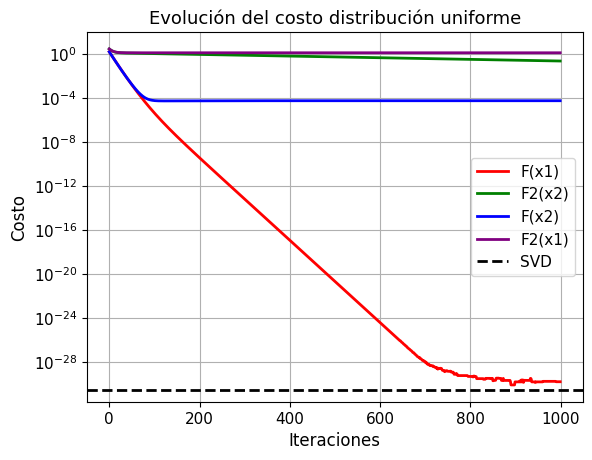

In [128]:
#Graficar costos uniforme:
plt.semilogy(cost_history_F, label='F(x1)', linewidth=2, color='red')
plt.semilogy(cost_history_F2, label='F2(x2)', linewidth=2, color='green')
plt.semilogy(cost_history_F_x2, label='F(x2)', linewidth=2, color='blue')
plt.semilogy(cost_history_F2_x, label='F2(x1)', linewidth=2, color='purple')
plt.axhline(cost_svd, linestyle='--', label='SVD', linewidth=2, color='black')
plt.xlabel('Iteraciones', fontsize=12)
plt.ylabel('Costo', fontsize=12)
plt.legend(fontsize=11)
plt.title('Evolución del costo distribución uniforme', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid()
plt.show()

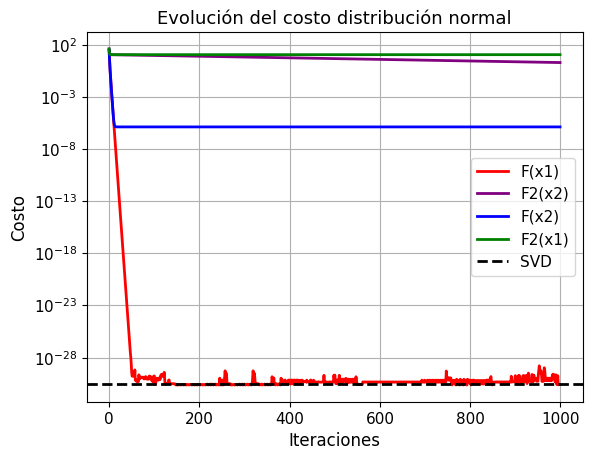

In [129]:
plt.semilogy(cost_history_F_n, label='F(x1)', linewidth=2, color='red')
plt.semilogy(cost_history_F2_n, label='F2(x2)', linewidth=2, color='purple')
plt.semilogy(cost_history_F_x2_n, label='F(x2)', linewidth=2, color='blue')
plt.semilogy(cost_history_F2_x_n, label='F2(x1)', linewidth=2, color='green')
plt.axhline(cost_svd_n, label='SVD', color = "black", linewidth=2, linestyle='--')
plt.xlabel('Iteraciones', fontsize=12)
plt.ylabel('Costo', fontsize=12)
plt.legend(fontsize=11)
plt.title('Evolución del costo distribución normal', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid()
plt.show()

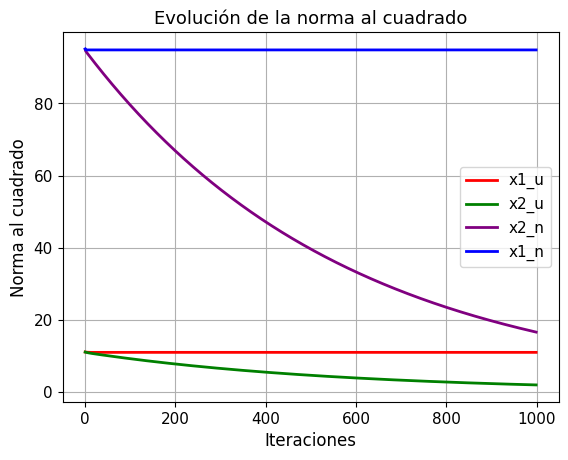

In [130]:
plt.plot(norm2_x, label='x1_u', linewidth=2, color='red')
plt.plot(norm2_x2, label='x2_u', linewidth=2, color='green')
plt.plot(norm2_x2_n, label='x2_n', linewidth=2, color='purple')
plt.plot(norm2_x_n, label='x1_n', linewidth=2, color='blue')
plt.xlabel('Iteraciones', fontsize=12)
plt.ylabel('Norma al cuadrado', fontsize=12)
plt.legend(fontsize=11)
plt.title('Evolución de la norma al cuadrado', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid()
plt.show()

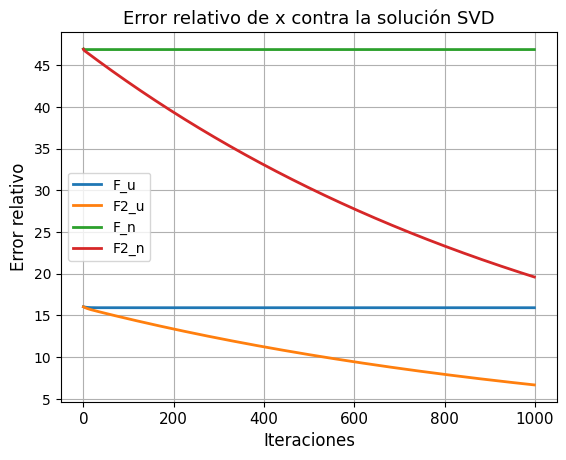

In [131]:
plt.plot(np.linalg.norm(np.array(x_history_F) - x_svd, axis=1)/np.linalg.norm(x_svd), label='F_u', linewidth=2)
plt.plot(np.linalg.norm(np.array(x_history_F2) - x_svd, axis=1)/np.linalg.norm(x_svd), label='F2_u', linewidth=2)
plt.plot(np.linalg.norm(np.array(x_history_F_n) - x_svd_n, axis=1)/np.linalg.norm(x_svd), label='F_n', linewidth=2)
plt.plot(np.linalg.norm(np.array(x_history_F2_n) - x_svd_n, axis=1)/np.linalg.norm(x_svd), label='F2_n', linewidth=2)
plt.xlabel('Iteraciones', fontsize=12)
plt.ylabel('Error relativo', fontsize=12)
plt.legend(fontsize=10)
plt.title('Error relativo de x contra la solución SVD', fontsize=13)
plt.xticks(fontsize=11)

plt.grid()
plt.show()

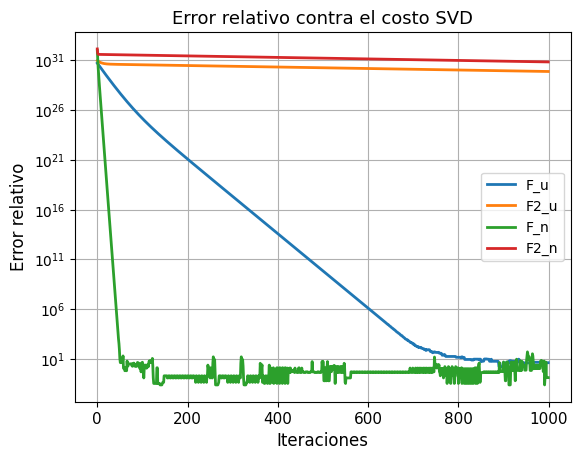

In [132]:
arr_cost_svd = np.repeat(cost_svd, num_iterations)
arr_cost_svd_n = np.repeat(cost_svd_n, num_iterations)
plt.plot(np.abs(cost_history_F - arr_cost_svd)/np.abs(arr_cost_svd), label='F_u', linewidth=2)
plt.plot(np.abs(cost_history_F2 - arr_cost_svd)/np.abs(arr_cost_svd), label='F2_u', linewidth=2)
plt.plot(np.abs(cost_history_F_n - arr_cost_svd_n)/np.abs(arr_cost_svd_n), label='F_n', linewidth=2)
plt.plot(np.abs(cost_history_F2_n - arr_cost_svd_n)/np.abs(arr_cost_svd_n), label='F2_n', linewidth=2)
plt.xlabel('Iteraciones', fontsize=12)
plt.ylabel('Error relativo', fontsize=12)
plt.yscale('log')
plt.legend(fontsize=10)
plt.title('Error relativo contra el costo SVD', fontsize=13)
plt.xticks(fontsize=11)
plt.grid()
plt.show()



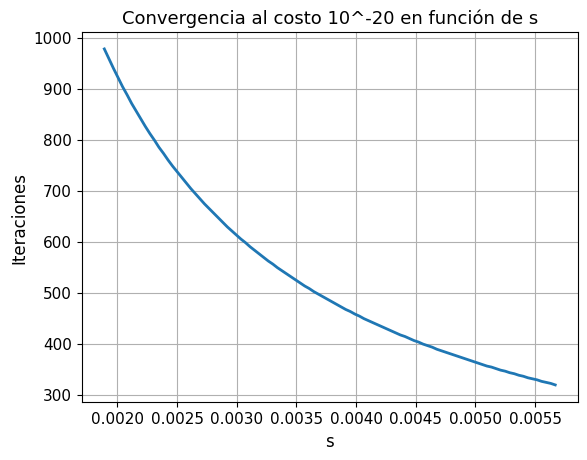

In [133]:
alpha_up = 1.5*alpha
alpha_down = 0.5*alpha
alphas = np.linspace(alpha_down, alpha_up, 100)
iterations_to_converge = np.zeros(100)

for i in range(100):
    _, cost_history_F_up, _ = gradient_descent(A, b, x, alphas[i], num_iterations)
    n = 1
    for c in cost_history_F_up:
        if c < 10**(-20):
            iterations_to_converge[i] = n
            break
        n += 1

plt.plot(alphas, iterations_to_converge, linewidth=2)
plt.xlabel('s', fontsize=12)
plt.ylabel('Iteraciones', fontsize=12)
plt.title('Convergencia al costo 10^-20 en función de s', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid()
plt.show()

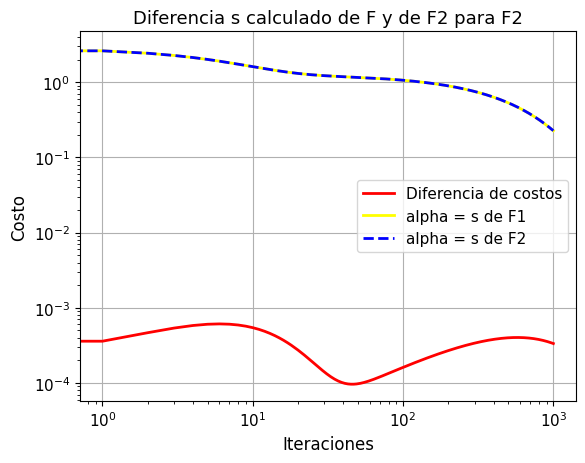

In [134]:
lambda_max_F2 = np.max(np.linalg.eigvals(2 * A.T @ A + 2 * delta2 * np.eye(d)))
alpha_F2 = 1 / lambda_max_F2
x_min_F2_a2, cost_history_F2_a2, x_history_F2_a2 = gradient_descent(A, b, x, alpha_F2, num_iterations, regularization='L2', delta2=delta2)

#Graficar F2 con diferentes valores de alpha
plt.semilogy(np.abs(np.array(cost_history_F2) - np.array(cost_history_F2_a2)), linewidth=2, color='red', label = 'Diferencia de costos')
plt.semilogy(cost_history_F2, label='alpha = s de F1', linewidth=2, color='yellow')
plt.semilogy(cost_history_F2_a2, label='alpha = s de F2', linewidth=2, color='blue', linestyle='--')
plt.xlabel('Iteraciones', fontsize=12)
plt.ylabel('Costo', fontsize=12)
plt.xscale('log')
plt.legend(fontsize=11)
plt.title('Diferencia s calculado de F y de F2 para F2', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid()
plt.show()

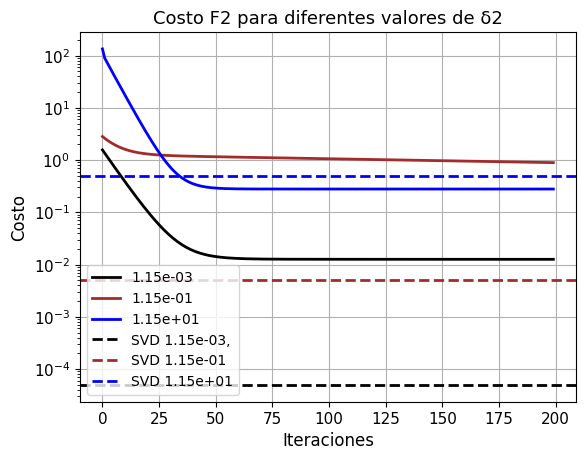

In [135]:
# Variación de delta2
delta2_values = [10**(-4) * sigma_max, 10**(-2) * sigma_max, 10**(0) * sigma_max]
cost_histories = []

for delta2 in delta2_values:
    _, cost_history_F2_varied, _ = gradient_descent(A, b, x, alpha, num_iterations, regularization='L2', delta2=delta2)
    cost_histories.append(cost_history_F2_varied)

cost_histories.append(cost_function_L2(A,x_svd,b,delta2_values[0]))
cost_histories.append(cost_function_L2(A,x_svd,b,delta2_values[1]))
cost_histories.append(cost_function_L2(A,x_svd,b,delta2_values[2]))


plt.semilogy(cost_histories[0][:200], label=f'{delta2_values[0]:.2e}', linewidth=2, color='black')
plt.semilogy(cost_histories[1][:200], label=f'{delta2_values[1]:.2e}', linewidth=2, color='brown')
plt.semilogy(cost_histories[2][:200], label=f'{delta2_values[2]:.2e}', linewidth=2, color='blue')
plt.axhline(cost_histories[3], label=f'SVD {delta2_values[0]:.2e},', color='black', linewidth=2, linestyle='--')
plt.axhline(cost_histories[4], label=f'SVD {delta2_values[1]:.2e}', color='brown', linewidth=2, linestyle='--')
plt.axhline(cost_histories[5], label=f'SVD {delta2_values[2]:.2e}', color='blue', linewidth=2, linestyle='--')
plt.xlabel('Iteraciones', fontsize=12)
plt.ylabel('Costo', fontsize=12)
plt.legend(fontsize=10)
plt.title('Costo F2 para diferentes valores de δ2', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid()
plt.show()

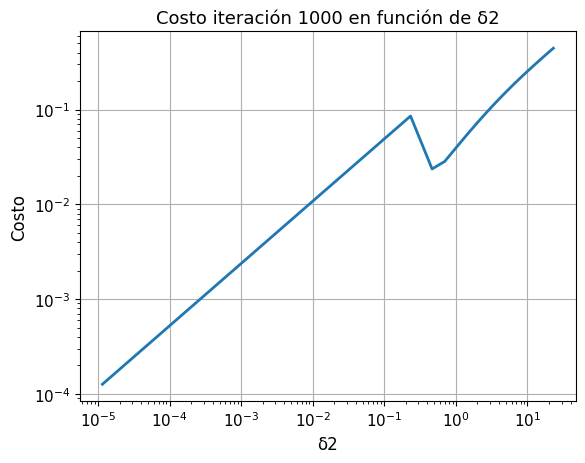

In [137]:
deltas = np.linspace((10**(-6) )* sigma_max, 2 * sigma_max, 100)
last_costs = np.zeros(100)

for i in range(100):
    _, cost_history_F2_delta, _ = gradient_descent(A, b, x, alpha, num_iterations, regularization='L2', delta2=deltas[i])
    last_costs[i] = cost_history_F2_delta[-1]

plt.plot(deltas, last_costs, linewidth=2)
plt.xlabel('δ2', fontsize=12)
plt.ylabel('Costo', fontsize=12)
plt.title('Costo iteración 1000 en función de δ2', fontsize=13)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid()
plt.show()
